In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [4]:
data['job'] = lbe.fit_transform(data["job"])
data['marital'] = lbe.fit_transform(data["marital"])
data['education'] = lbe.fit_transform(data["education"])
data['default'] = lbe.fit_transform(data["default"])
data['housing'] = lbe.fit_transform(data["housing"])
data['loan'] = lbe.fit_transform(data["loan"])
data['contact'] = lbe.fit_transform(data["contact"])
data['month'] = lbe.fit_transform(data["month"])
data['day_of_week'] = lbe.fit_transform(data["day_of_week"])
data['poutcome'] = lbe.fit_transform(data["poutcome"])
data['y'] = lbe.fit_transform(data["y"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int32  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
y = data["y"]
X = data.drop(['y', 'loan', 'day_of_week', 'housing'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [9]:
y_train.shape

(30891,)

In [10]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout,BatchNormalization,Activation
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from tensorflow import keras

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)

# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 9)                 153       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, shuffle=True, validation_data=(X_test,y_test))

Epoch 1/50
3862/3862 [==============================] - 10s 2ms/step - loss: 22.3839 - accuracy: 0.8297 - f1_m: 0.1435 - precision_m: 0.1604 - recall_m: 0.1658 - val_loss: 0.7919 - val_accuracy: 0.8955 - val_f1_m: 0.1470 - val_precision_m: 0.1743 - val_recall_m: 0.1381
Epoch 2/50
3862/3862 [==============================] - 9s 2ms/step - loss: 0.4462 - accuracy: 0.8824 - f1_m: 0.1325 - precision_m: 0.1549 - recall_m: 0.1307 - val_loss: 0.5395 - val_accuracy: 0.7626 - val_f1_m: 0.2810 - val_precision_m: 0.2408 - val_recall_m: 0.3994ion_m: 0.1555 - recall_m:  - ETA: 0s - loss: 0.4464 - accuracy: 0.8823 - f1_m: 0.1328 - precision_m: 0.1553 - recall_m: 0.13
Epoch 3/50
3862/3862 [==============================] - 10s 3ms/step - loss: 0.3778 - accuracy: 0.8849 - f1_m: 0.1266 - precision_m: 0.1428 - recall_m: 0.1296 - val_loss: 0.3012 - val_accuracy: 0.8963 - val_f1_m: 0.1368 - val_precision_m: 0.1646 - val_recall_m: 0.1267
Epoch 4/50
3862/3862 [==============================] - 9s 2ms/step -

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_accuracy', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


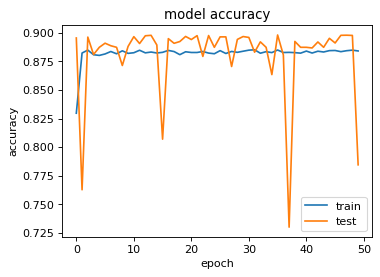

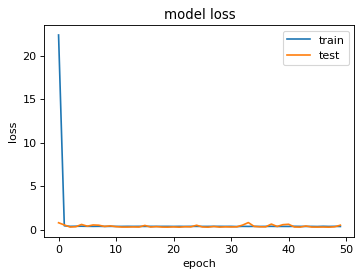

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(5, 3.5), dpi=80)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
figure(figsize=(5, 3.5), dpi=80)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))

966/966 [==============================] - 2s 2ms/step - loss: 0.5080 - accuracy: 0.7824 - f1_m: 0.3819 - precision_m: 0.2933 - recall_m: 0.6395

accuracy: 78.24%

f1_m: 38.19%

precision_m: 29.33%

recall_m: 63.95%


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
tahmin=model.predict(X_test)

In [17]:
r_auc = roc_auc_score(y_test, tahmin)

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, tahmin)

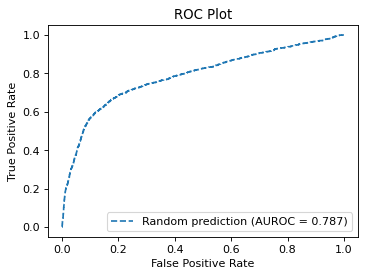

In [19]:
figure(figsize=(5, 3.5), dpi=80)

plt.plot(fpr, tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7278 1859]
 [ 360  800]]


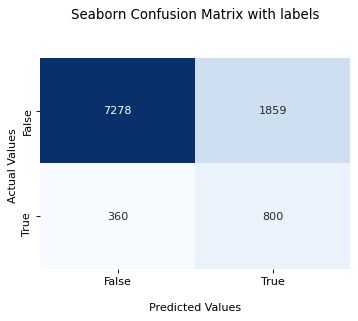

In [21]:
import seaborn as sns
figure(figsize=(5, 3.5), dpi=80)
ax = sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()